In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
import healpy as hp
import numpy as np

import pickle as pk
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
import libparam_cross as method

usage: ipykernel_launcher.py [-h] [-ivt] [-ivp] [-dd] [-delens] [-cl] [-lh]
                             inifile
ipykernel_launcher.py: error: unrecognized arguments: -f


Simulation uses /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/LiteBird_s4mask/RS/Maps
Simulation uses a combination of /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/LiteBird_s4mask/RS/Maps and /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMBS4/RS/Maps
Simulation Warning: Default first filebase and first beam assumes LiteBird
Delensing uses QE: p
Workspace intializing from /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/litebird_S4pLB/RS/Pseudo/workspace/coupling_matrix.fits


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 1069.71simulation/s]


Bandpower calculated


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 1643.57simulation/s]


Fitting Delensed spectra between l=30 and l=150


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 4400.93simulation/s]


Likelihood: HL
delensed len:12


Covariance of delensed CMB spectra: 100%|██████████| 100/100 [00:00<00:00, 4911.77simulation/s]

Likelihood: HL_mod


Bad posteriors: 0


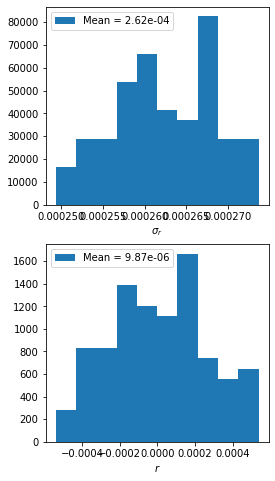

In [6]:
method.lh_lib.plot_stat(savefig=True)

Bad posteriors: 0


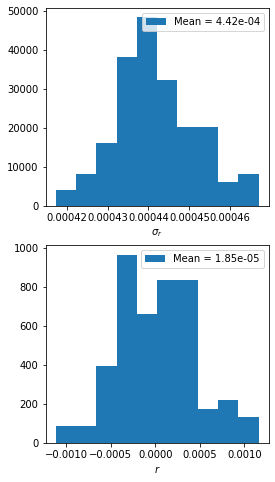

In [7]:
method.lh_lib.plot_stat(savefig=1)